#**LETS GROW MORE**
**Name:** PRIYADHARSHINI RAMESH

**Task Level:** Beginner

**Task:** 2

**Title:** Stock Market Prediction and Forecasting Using Stacked LSTM


***Import the required libraries:***

In [6]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

***Load the dataset:***

In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


***Data Preprocessing:***

In [8]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [9]:
data.shape

(2035, 8)

In [10]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [12]:
close = data['Close']
close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [14]:
close.shape

(2035,)

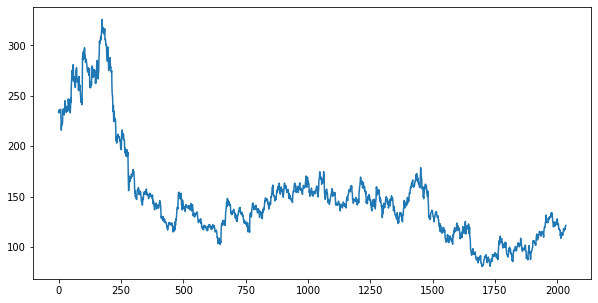

In [13]:
plt.figure(figsize = (10,5))
plt.plot(close)

*Close value is in a kind of scale, we should always try to transform value.
Here we will use min-max scalar to transform the values from 0 to 1*

***Scaling:***

In [15]:
scaler = MinMaxScaler(feature_range = (0,1))
close = scaler.fit_transform(np.array(close).reshape(-1,1))

In [16]:
close.shape

(2035, 1)

***Split the data into train and test dataset:***

In [29]:
training_size = int(len(close) * 0.75)
test_size = len(close) - training_size
train, test = close[0:training_size,:], close[training_size:len(close),:1]

***Data Preprocessing:***

In [26]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [31]:
time_step = 100
train_x, train_y = create_dataset(train, time_step)
test_x, test_y = create_dataset(test, time_step)

***Reshape the data to fit the LSTM:***

In [32]:
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], 1)
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], 1)

***Creating the LSTM Model:***

In [33]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


***Training the model:***

In [36]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(train_x, train_y, validation_data = (test_x, test_y), epochs = 50, batch_size = 40)

Epoch 1/50
36/36 [==============================] - 15s 239ms/step - loss: 0.0014 - val_loss: 9.5841e-04
Epoch 2/50
36/36 [==============================] - 6s 171ms/step - loss: 7.8227e-04 - val_loss: 6.4582e-04
Epoch 3/50
36/36 [==============================] - 6s 171ms/step - loss: 7.4891e-04 - val_loss: 6.1934e-04
Epoch 4/50
36/36 [==============================] - 7s 194ms/step - loss: 7.4163e-04 - val_loss: 9.5970e-04
Epoch 5/50
36/36 [==============================] - 6s 174ms/step - loss: 7.2442e-04 - val_loss: 6.9267e-04
Epoch 6/50
36/36 [==============================] - 6s 169ms/step - loss: 7.2319e-04 - val_loss: 5.3303e-04
Epoch 7/50
36/36 [==============================] - 6s 173ms/step - loss: 6.5853e-04 - val_loss: 8.1476e-04
Epoch 8/50
36/36 [==============================] - 6s 172ms/step - loss: 5.6133e-04 - val_loss: 4.4100e-04
Epoch 9/50
36/36 [==============================] - 6s 175ms/step - loss: 6.1715e-04 - val_loss: 5.8798e-04
Epoch 10/50
36/36 [============

***Prediction:***

In [38]:
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)

***Transform into original form:***

In [39]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

***Mean Squared Error:***

In [44]:
import math
math.sqrt(mean_squared_error(train_y, train_predict))

163.0735780665738

***Predicted value Vs Close Value:***

In [62]:
predict_y = model.predict(test_x)

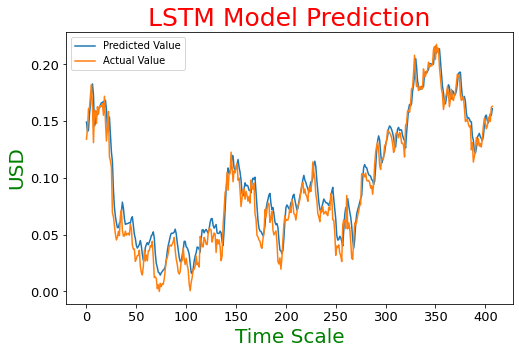

In [65]:
plt.figure(figsize = (8,5))
plt.xticks(size=13)
plt.yticks(size=13)
plt.plot(predict_y, label = 'Predicted Value')
plt.plot(test_y, label='Actual Value')
plt.title('LSTM Model Prediction', color = 'r', size=25)
plt.xlabel('Time Scale', color ='green', size = 20)
plt.ylabel('USD', color='green', size = 20)
plt.legend()
plt.show()